# Overview

This project analyses the housing in Kings County to identify what features have a strong relationship with price. 

# Data Understanding and Preparation

In [1]:
# Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols


sales = pd.read_csv('data/kc_house_data.csv')
pd.options.display.float_format = '{:,.0f}'.format
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,nan,0,...,7,1180,0.0,1955,0,98178,48,-122,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400.0,1951,"1,991",98125,48,-122,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,...,6,770,0.0,1933,nan,98028,48,-122,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,48,-122,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,48,-122,1800,7503


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
#check for any NAN value
sales.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Based on the above, Waterfront and Yr Renovated require data cleasning 

In [4]:
#drop columns that are not useful to the purpose of this data analysis
sales.drop(sales.iloc[:, 16:21], inplace=True, axis=1)
sales.drop(sales.iloc[:, 12:14], inplace=True, axis=1)
sales.drop(sales.iloc[:, 9:10], inplace=True, axis=1)
sales.drop(sales.iloc[:, 0:2], inplace=True, axis=1)

#replace NAN value 
sales["waterfront"] = sales["waterfront"].fillna(0)
sales["yr_renovated"] = sales["yr_renovated"].fillna(0)
#add "age" column 
sales['age']=[2023] - sales.loc[:,"yr_built"]


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    21597 non-null  float64
 7   condition     21597 non-null  int64  
 8   grade         21597 non-null  int64  
 9   yr_built      21597 non-null  int64  
 10  yr_renovated  21597 non-null  float64
 11  age           21597 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


# Base Model 

In [6]:
X = sales.drop('price', axis=1)
y=sales['price']
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3936.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:49:56   Log-Likelihood:            -2.9618e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21586   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3376      0.033     41.137      0.000       1.274       1.401
bedrooms     -4.238e+04   2051.101    -20.661      0.000   -4.64e+04   -3.84e+04
bathrooms     4.935e+04   3480.907     14.178      0.000    4.25e+04    5.62e+04
sqft_living    177.3030      3.303     53.682      0.000     170.829     183.777
sqft_lot        -0.2437      0.037     -6.626      0.000      -0.316      -0.172
floors        2.055e+04   3461.733      5.936      0.000    1.38e+04    2.73e+04
waterfront    7.518e+05   1.84e+04     40.893      0.000    7.16e+05    7.88e+05
condition      2.02e+04   2515.446      8.031      0.000    1.53e+04    2.51e+04
grade         1.299e+05   2155.845     60.276      0.000    1.26e+05    1.34e+05
yr_built      -535.6120      8.685    -61.669      0.000    -552.636    -518.588
yr_renovated    14.3579      4.309      3.332      0.001       5.913      22.803
age           3241.6102     67.284     48.178      0.000    3109.728    3373.493
==============================================================================
Omnibus:                    15847.393   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1006948.729
Skew:                           2.936   Prob(JB):                         0.00
Kurtosis:                      35.932   Cond. No.                     2.06e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

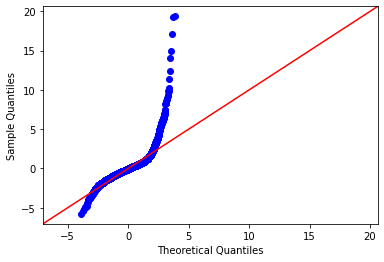

In [7]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

# Transformation and validation

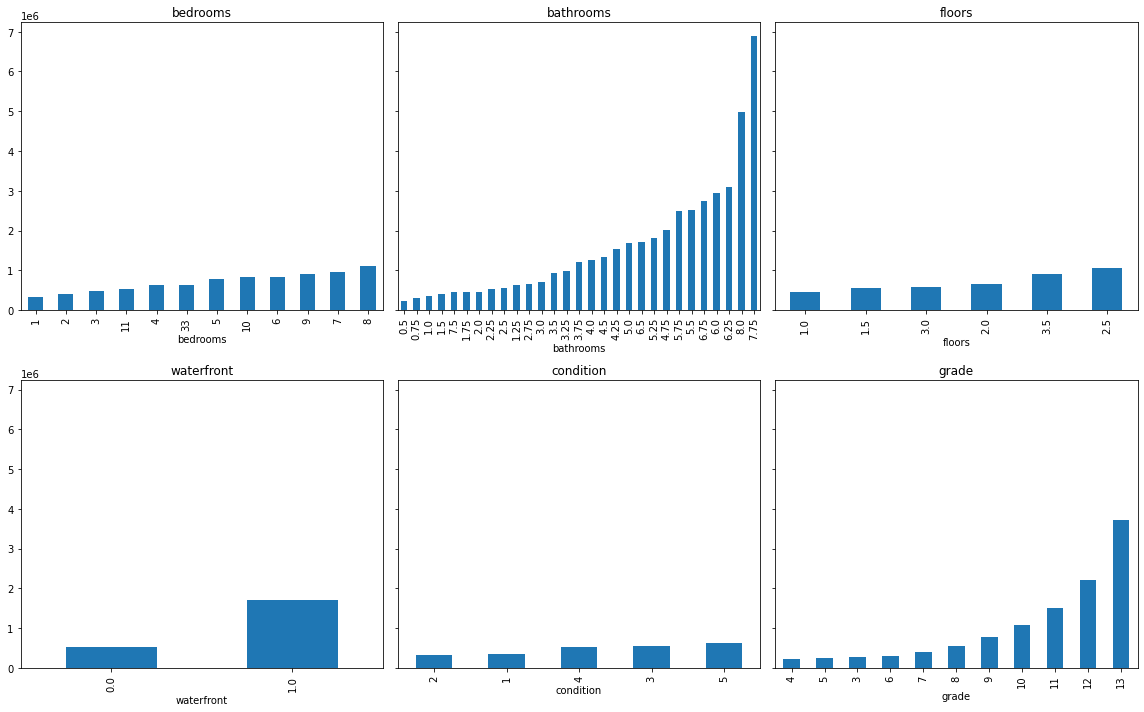

In [8]:
#Check categorical variables

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (sales.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [9]:
#drop 'waterfront' "Floors" and "conditions" as they do not show a significant relationship to price
sales.drop(sales.iloc[:, 9:11], inplace=True, axis=1)
sales.drop(sales.iloc[:, 7:8], inplace=True, axis=1)
sales.drop(sales.iloc[:, 6:7], inplace=True, axis=1)

sales.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,age
0,"221,900",3,1,1180,5650,1,7,68
1,"538,000",3,2,2570,7242,2,7,72
2,"180,000",2,1,770,10000,1,6,90
3,"604,000",4,3,1960,5000,1,7,58
4,"510,000",3,2,1680,8080,1,8,36


In [10]:
#split bedrooms, bathrooms and grade into 2 groups to create dummies and drop the original columns 

sales['beds'] = ['1-4beds' if x <=4 else '4+beds' for x in sales['bedrooms']]
sales['baths']=['1-5baths' if x <=5 else '5+baths' for x in sales['bathrooms']]
sales['quality']=['low' if x <=8 else 'high' for x in sales['grade']]
sales= sales.drop(['bedrooms','bathrooms','floors','grade'], axis=1)

sales.head()

,price,sqft_living,sqft_lot,age,beds,baths,quality
0,"221,900",1180,5650,68,1-4beds,1-5baths,low
1,"538,000",2570,7242,72,1-4beds,1-5baths,low
2,"180,000",770,10000,90,1-4beds,1-5baths,low
3,"604,000",1960,5000,58,1-4beds,1-5baths,low
4,"510,000",1680,8080,36,1-4beds,1-5baths,low


In [11]:
#create dummies: 

categoricals = ['beds', 'baths', 'quality']
sales_ohe=pd.get_dummies(sales[categoricals], prefix=categoricals, drop_first=True)

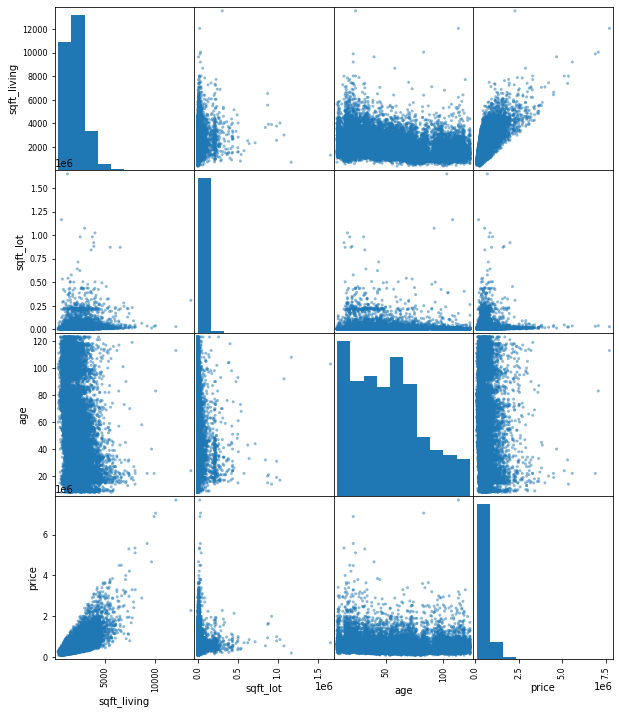

In [12]:
# check distribution of the continuous variables 

continuous = ['sqft_living','sqft_lot','age','price']
sales_cont = sales[continuous]
pd.plotting.scatter_matrix(sales_cont, figsize=(10,12));

In [13]:
# log features
log_names = [f'{column}_log' for column in sales_cont.columns]

sales_log = np.log(sales_cont)
sales_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

sales_log_norm = sales_log.apply(normalize)

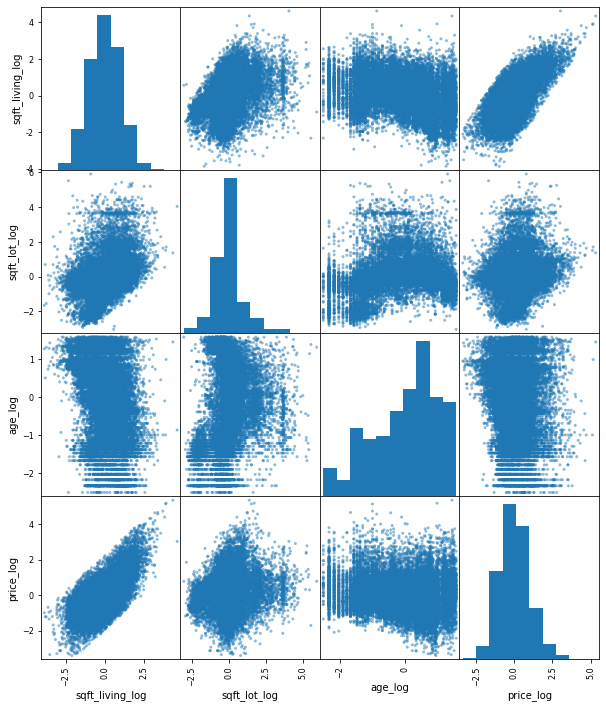

In [14]:
pd.plotting.scatter_matrix(sales_log_norm, figsize=(10,12));

In [15]:
preprocessed = pd.concat([sales_log_norm, sales_ohe], axis=1)
preprocessed.head()

,sqft_living_log,sqft_lot_log,age_log,price_log,beds_4+beds,baths_5+baths,quality_low
0,-1,-0,1,-1,0,0,1
1,1,-0,1,0,0,0,1
2,-2,0,1,-2,0,0,1
3,0,-1,0,0,0,0,1
4,-0,0,-0,0,0,0,1


In [16]:
#rerun the model 
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [17]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4379.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:50:02   Log-Likelihood:                -22047.
No. Observations:               21597   AIC:                         4.411e+04
Df Residuals:                   21590   BIC:                         4.416e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.6483      0.012     52.155      0.000       0.624       0.673
sqft_living_log     0.6116      0.006     96.263      0.000       0.599       0.624
sqft_lot_log       -0.1587      0.005    -31.369      0.000      -0.169      -0.149
age_log             0.2048      0.005     39.568      0.000       0.195       0.215
beds_4+beds        -0.0541      0.017     -3.167      0.002      -0.088      -0.021
baths_5+baths       0.9173      0.104      8.852      0.000       0.714       1.120
quality_low        -0.8034      0.014    -55.903      0.000      -0.832      -0.775
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.586
Skew:                          -0.005   Prob(JB):                        0.746
Kurtosis:                       3.024   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

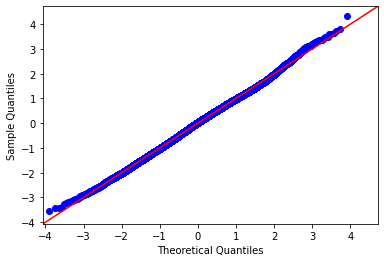

In [18]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [19]:
#drop ages and check if it has improved the model R square 
preprocessed= preprocessed.drop(['age_log'], axis=1)


In [20]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4608.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:50:02   Log-Likelihood:                -22803.
No. Observations:               21597   AIC:                         4.562e+04
Df Residuals:                   21591   BIC:                         4.567e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5613      0.013     44.298      0.000       0.536       0.586
sqft_living_log     0.5399      0.006     85.608      0.000       0.527       0.552
sqft_lot_log       -0.1005      0.005    -20.049      0.000      -0.110      -0.091
beds_4+beds         0.0122      0.018      0.691      0.489      -0.022       0.047
baths_5+baths       0.9037      0.107      8.421      0.000       0.693       1.114
quality_low        -0.7024      0.015    -47.955      0.000      -0.731      -0.674
==============================================================================
Omnibus:                       67.267   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.111
Skew:                           0.116   Prob(JB):                     7.27e-15
Kurtosis:                       2.862   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

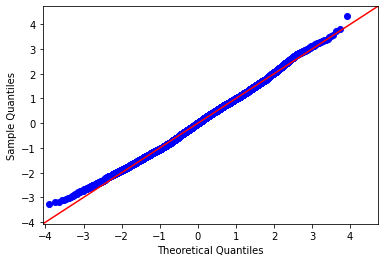

In [21]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [22]:
preprocessed= preprocessed.drop(['beds_4+beds'], axis=1)
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']


In [23]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     5760.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:50:02   Log-Likelihood:                -22803.
No. Observations:               21597   AIC:                         4.562e+04
Df Residuals:                   21592   BIC:                         4.566e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5617      0.013     44.398      0.000       0.537       0.587
sqft_living_log     0.5411      0.006     89.843      0.000       0.529       0.553
sqft_lot_log       -0.1006      0.005    -20.074      0.000      -0.110      -0.091
baths_5+baths       0.9087      0.107      8.487      0.000       0.699       1.119
quality_low        -0.7016      0.015    -48.041      0.000      -0.730      -0.673
==============================================================================
Omnibus:                       67.763   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.605
Skew:                           0.116   Prob(JB):                     5.68e-15
Kurtosis:                       2.862   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

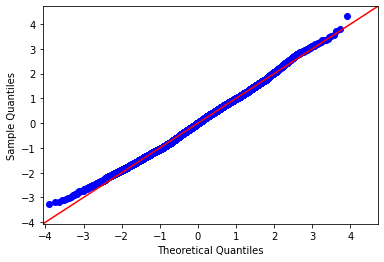

In [24]:
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

QQ plot shows that the normality assumption of the residuals seems fulfilled.

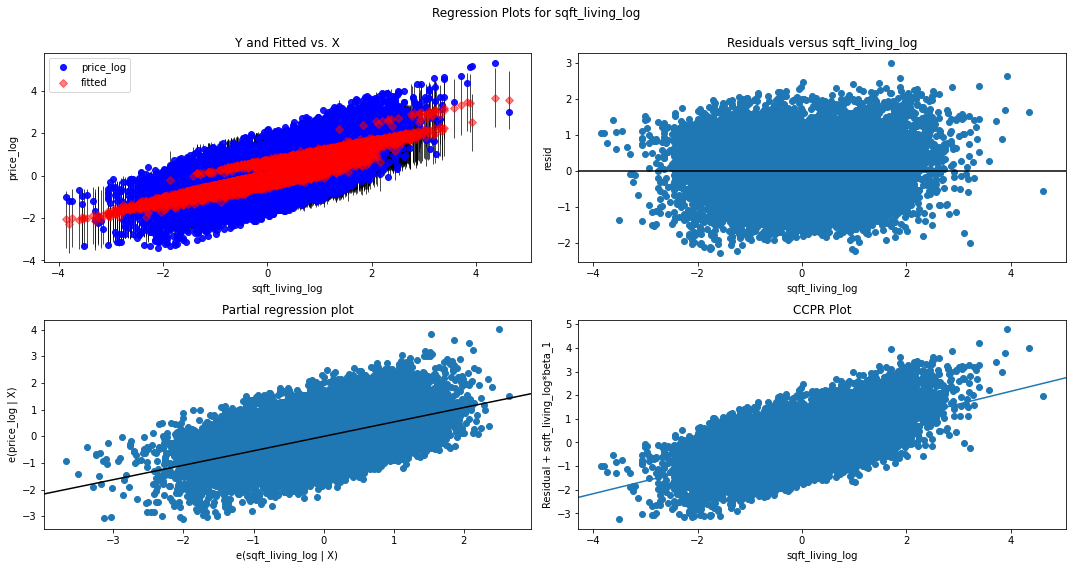

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living_log", fig=fig)
plt.show()


From the first and second plot in the first row, we see the residuals appear to be equal across the regression line which is a sign of Homoscedasticity. 

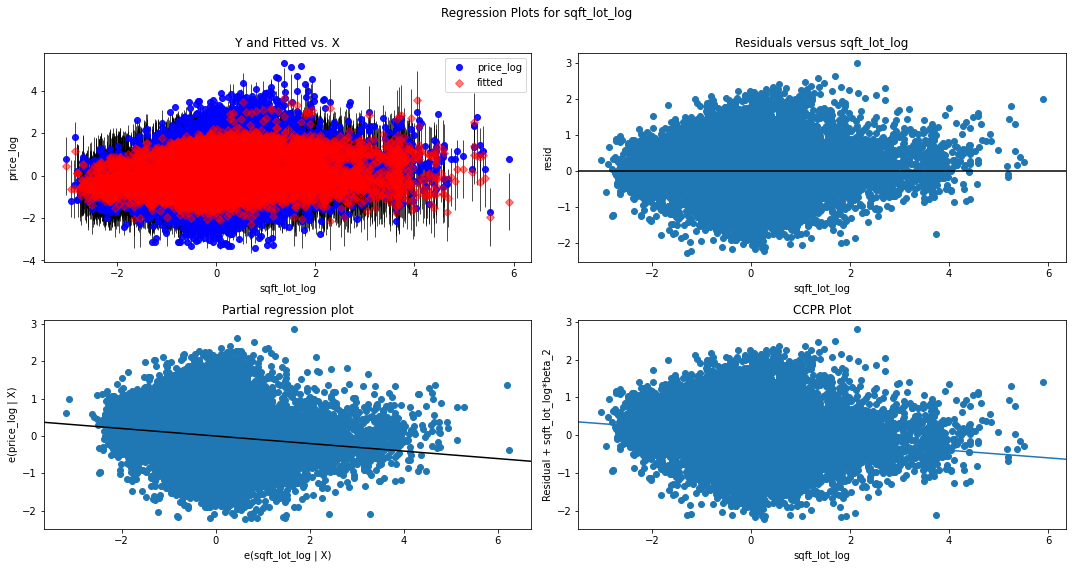

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot_log", fig=fig)
plt.show()

However, for the Lot area,  the residuals do not appear to be equal across the regression line which is a sign of heteroscedasticity i.e. the residuals are heteroscedastic. This violates an assumption.

Train-Test Split:
Perform a train-test split with a test set of 20% and a random state of 4.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [28]:
#Fit a linear regression model on the training set

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [29]:
#Generate Predictions on Training and Test Sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [30]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.48344525331522825
Test Mean Squared Error:  0.48512251743393336


The difference between Test MSE and Train MSE is quite small (appx 0.35%)

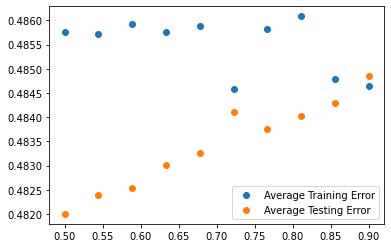

In [31]:
##Evaluate the effect of train tesst split size: 
#Iterate over a range of train-test split sizes from .5 to .9
#For each train-test split size, generate 10 iterations of models/errors and save the average train/test error. 
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

categoricals = ['baths_5+baths', 'quality_low']
continuous = ['sqft_living_log','sqft_lot_log']

log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)
for t_size in t_sizes:
    
    inner_train_mses = []
    inner_test_mses = []
    for i in range(10):
        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=i)

        # Fit model
        linreg.fit(X_train, y_train)

        # Append metrics to their respective lists
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        inner_train_mses.append(mean_squared_error(y_train, y_hat_train))
        inner_test_mses.append(mean_squared_error(y_test, y_hat_test))

    train_mses.append(np.mean(inner_train_mses))
    test_mses.append(np.mean(inner_test_mses))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Average Training Error')
ax.scatter(t_sizes, test_mses, label='Average Testing Error')
ax.legend();

As above, the average testing error is generally lower than the training error. This suggests that the model may generalize well to future cases.

# Interpretation 

The model summary shows that the R-squared value is 0.516 i.e. 51.6% of the house price can be explained by the dependent variables. 

sqft_living_log - footage of the home; ; sqft_lot_log - footage of the lot; number of bathrooms and grade are found to tatistically significant to the pricing of a property in King County. 

Footage of the home and the number of bathrooms have a positive relationship with the house price i.e. # increase in home footage or a home with more than 5 bathroom results in an increase in the house price. Similarly, quality_low - grade - a lower grade of a property is associated with a lower value in house price. 

Wheras, sqft_lot_log - footage of the lot has an inversed relationship with the house price. Increase in footage of the lot is associated with a decrease in price of the house. 

Model validation: 
QQ plot shows that the normality assumption of the residuals seems fulfilled. 

In further analysis, for living footage, we can see the residuals appear to be equal across the regression line which is a sign of Homoscedasticity. However, for the Lot area, the residuals do not appear to be equal across the regression line which is a sign of heteroscedasticity i.e. the residuals are heteroscedastic. Therefore, living footage may be a better indicator/feature to be used. 

The first train test shows that the difference between Test MSE and Train MSE is quite small (appx 0.35%). Similarly when run the train over 10 iterations over a range of train-test split sizes from .5 to .9, the Testing Error are better than the training error and the difference is also quite small. This suggests that the model is fitting well. 